## Basics of Logistic Regression

Create a logistic regression based on the bank data. 

The data is based on the marketing campaign efforts ofa Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note: The first column of the dataset is the index

### Import the relevant libraries

In [124]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Load the data

In [125]:
raw_data = pd.read_csv('datasets/bank_data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


### Convert All yes and no entries to 1 and 0

In [126]:
# make a copy of the data before we alter it
data = raw_data.copy()
# removes index column that came with the data 
data = data.drop(['Unnamed: 0'], axis=1) 

data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [127]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


## Declare the dependent and independent variables

In [128]:
y = data['y']
x1 = data['duration']

## Plot with Logistic Regression Curve

## Regression 

In [129]:
x = sm.add_constant(x1) # grabs constants
reg_log = sm.Logit(y,x) # calculates the regression
results_log = reg_log.fit() # stats models use a machine learning algorithm to fit the regression 
# max number of iterations is 35 

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


## Interpretation & Summary

The dependent variable is 'duration'. The model used a Logit regression, while the method - Maximum Likelihood Estimation(MLE). It has clearly converged after classifying 518 observations

The Pseudo R-squared is 0.21 which is within the acceptable region
The duration variable is significant and its coefficient is .0051
The constant is also significant and equals: -1.7

In [130]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                  0.2121
Time:                        12:24:47   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

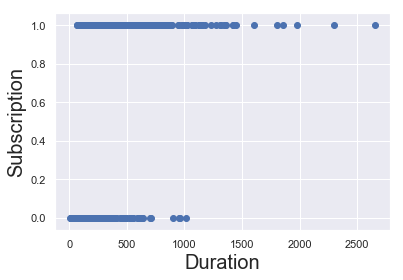

In [131]:
## Graph The Model 
plt.scatter(x1,y,color='C0')

plt.xlabel('Duration', fontsize=20)
plt.ylabel('Subscription',  fontsize=20)
plt.show()

## Find Odds of Our Duration

In [132]:
# the odds of duration are the exponential of the log odds from the summary table 
np.exp(.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression. 

Note that we could have inferred that from the coeffcient itself.

Finally, note that the data is not standardized (scaled) and duration is a feauture of a relatively big order of magnitude. 

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the 'interest rate','march','credit' and 'previous' estimators to our model and run the regression again.

### Declare the independent variable(s)

In [144]:
# To avoid retyping these out again, we save our estimators into a list.
features = ['interest_rate', 'march', 'credit', 'previous', 'duration']

X1_all = data[features]
y = data['y']

In [145]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-03-25 12:28 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

## Accuracy of Model

In [146]:
def confusion_matrix(data, actual_values,model):
    # Confusion Matrix 
    
    # data: dataframe or array 
        # data is a dataframe formatted in the same way as your input data (without the actual values)
        # ex: const, var1, var2, etc. Order is important!
    # actual values: data frame or array
        # These are the actual values from test_data
        # In the case of a logistic regression, it should be a single column with 0s and 1s
        
    # model: a LogitResults object
        # this is the variable where you have the fitted model
        # ex: results_log in this course
    # predicts values using Logit model
    pred_values = model.predict(data)
    # specify the bins
    bins=np.array([0,0.5,1])
    # create a histogram where if values are b/w 0 - .5 = 0
    # if values .5 - 1 = 1 
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # calculates the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    return cm, accuracy 

In [147]:
confusion_matrix(X_all,y,results_logit)

(array([[218.00, 41.00],
        [30.00, 229.00]]),
 0.862934362934363)

In [148]:
# Confusion Matrix - shows how confused our model was
results_log.pred_table()

array([[204.00, 55.00],
       [104.00, 155.00]])

In [149]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


- For 204 observations the model predicted 0 and the true value was 0
- For 155 observations the model predicted 1 and the true values was 1
- However 
- In 104 observations the model predicted 0 while the true value was 1
- In 55 observations the model predicted 1 and the true value was 0 

In [150]:
## Time to Calculate Accuracy of Model
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1]/cm.sum())
accuracy_train

204.2992277992278

## Testing the model and assessing its accuracy 

Load the Bank test data file provided. Convert all categorical values to boolean

In [151]:
raw_data2 = pd.read_csv('datasets/Bank_data_testing.csv')
data_test = raw_data2.copy()

data_test = data_test.drop(['Unnamed: 0'], axis=1)

In [152]:
## Convert the outcome variable into 1s and 0s again.

data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and independent variables

In [153]:
y_test = data_test['y']
# We alredy declared a list called 'features' that holds all the revelant estimators for our model 
X1_test = data_test[features]
X_test = sm.add_constant(X1_test)

- Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy. 
- Determine the Confusion Matrix and the accuracy of the model with the new data. Note that the model itself stays the same (results_logit).

In [154]:
# test accuracy 
confusion_matrix(X_test, y_test, results_logit)

(array([[93.00, 18.00],
        [13.00, 98.00]]),
 0.8603603603603603)

## Analysis 

Looking at the test accuracy we see a number which is tiny but lower han 86.04%. compared to 86.29% for training accuracy. 
In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck. 